<a href="https://colab.research.google.com/github/rufous86/hh_api/blob/main/Dataton2022(melehov).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [ ]:
res = []
def get_vacancy(vacancies, pages=100):
    for vacancy in tqdm(vacancies):
        print(f'collecting <{vacancy}>')
        for page in tqdm(range(pages)):
            params = {
                'text': f'{vacancy}',
                'page': page,
                'per_page': 100,
                'only_with_salary': 'true',
                }
            req = requests.get('https://api.hh.ru/vacancies', params).json()
            if 'items' in req.keys():
                res.extend(req['items'])

vacancies = ['maching AND learning', 'data AND science', 'sql', 'NLP',
             'spark', 'hadoop', 'pandas', 'dask', 'deep AND learning', 'pytorch',
             'tensorflow', 'keras', 'ai AND developer', 'computer AND vision',
            'нейронные AND сети', 'big AND data']
get_vacancy(vacancies)

data = pd.DataFrame(res)

  0%|          | 0/16 [00:00<?, ?it/s]

collecting <maching AND learning>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <data AND science>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <sql>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <NLP>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <spark>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <hadoop>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <pandas>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <dask>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <deep AND learning>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <pytorch>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <tensorflow>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <keras>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <ai AND developer>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <computer AND vision>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <нейронные AND сети>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <big AND data>


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
data.head(2)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,73259890,False,Senior Machine Learning Engineer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 4000, 'to': 5800, 'currency': 'EUR', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/73259890,[],"{'id': '5372145', 'name': 'F-ONE', 'url': 'htt...",{'requirement': 'We believe that a strong unde...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],True
1,74140621,False,Data Engineer,None,False,False,"{'id': '13', 'name': 'Армения', 'url': 'https:...","{'from': None, 'to': 5000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/74140621,[],"{'id': '9849', 'name': 'Social Discovery Ventu...",{'requirement': 'Опыт анализа большого объема ...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],True


In [ ]:
df = data.copy()

columns = ['name', 'salary', 'schedule', 'accept_temporary', 'area', 'published_at']
df = df[columns]
df.head()

,name,salary,schedule,accept_temporary,area,published_at
0,Senior Machine Learning Engineer,"{'from': 4000, 'to': 5800, 'currency': 'EUR', ...","{'id': 'fullDay', 'name': 'Полный день'}",True,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2022-12-24T01:29:25+0300
1,Data Engineer,"{'from': None, 'to': 5000, 'currency': 'USD', ...","{'id': 'fullDay', 'name': 'Полный день'}",True,"{'id': '13', 'name': 'Армения', 'url': 'https:...",2022-12-22T12:13:48+0300
2,Аналитик Data Science (консультант),"{'from': 15, 'to': 20, 'currency': 'USD', 'gro...","{'id': 'remote', 'name': 'Удаленная работа'}",False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2022-12-23T09:18:27+0300
3,Machine learning engineer/ разработчик машинно...,"{'from': 200000, 'to': 400000, 'currency': 'RU...","{'id': 'remote', 'name': 'Удаленная работа'}",False,"{'id': '72', 'name': 'Пермь', 'url': 'https://...",2022-12-19T13:22:24+0300
4,Data Engineer,"{'from': None, 'to': 5000, 'currency': 'USD', ...","{'id': 'fullDay', 'name': 'Полный день'}",True,"{'id': '2758', 'name': 'Тбилиси', 'url': 'http...",2022-12-22T12:13:48+0300


In [ ]:
df["city"] = (df["area"]
                     .apply(lambda x: x.get("name") 
                                      if isinstance(x, dict) 
                                      else np.nan))
df["schedule"] = (df["schedule"]
                     .apply(lambda x: x.get("id") 
                                      if isinstance(x, dict) 
                                      else np.nan))
df["salary_from"] = (df["salary"]
                     .apply(lambda x: x.get("from") 
                                      if isinstance(x, dict) 
                                      else np.nan))
df["salary_to"] = (df["salary"]
                     .apply(lambda x: x.get("to") 
                                      if isinstance(x, dict) 
                                      else np.nan))
df["salary_currency"] = (df["salary"]
                     .apply(lambda x: x.get("currency") 
                                      if isinstance(x, dict) 
                                      else np.nan))

df = df.drop(['salary', 'area'], axis=1)
df.head()

,name,schedule,accept_temporary,published_at,city,salary_from,salary_to,salary_currency
0,Senior Machine Learning Engineer,fullDay,True,2022-12-24T01:29:25+0300,Москва,4000.0,5800.0,EUR
1,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Армения,NaN,5000.0,USD
2,Аналитик Data Science (консультант),remote,False,2022-12-23T09:18:27+0300,Москва,15.0,20.0,USD
3,Machine learning engineer/ разработчик машинно...,remote,False,2022-12-19T13:22:24+0300,Пермь,200000.0,400000.0,RUR
4,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Тбилиси,NaN,5000.0,USD


In [ ]:
! pip install currencyconverter

In [ ]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()
c.currencies

def currency_convert(salary, salary_currency):
    if salary_currency == 'RUR':
        salary_currency = 'RUB'
    if salary_currency not in c.currencies:
        return np.nan
    return salary * c.convert(1, 'RUB', salary_currency)**(-1)

In [ ]:
df['salary_from'] = df.apply(lambda x: currency_convert(x['salary_from'], x['salary_currency']), axis=1)
df['salary_to'] = df.apply(lambda x: currency_convert(x['salary_to'], x['salary_currency']), axis=1)
df.drop('salary_currency', axis=1)

,name,schedule,accept_temporary,published_at,city,salary_from,salary_to
0,Senior Machine Learning Engineer,fullDay,True,2022-12-24T01:29:25+0300,Москва,468804.0,679765.8
1,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Армения,NaN,525000.0
2,Аналитик Data Science (консультант),remote,False,2022-12-23T09:18:27+0300,Москва,1575.0,2100.0
3,Machine learning engineer/ разработчик машинно...,remote,False,2022-12-19T13:22:24+0300,Пермь,200000.0,400000.0
4,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Тбилиси,NaN,525000.0
...,...,...,...,...,...,...,...
3196,Frontend-разработчик Vue,remote,False,2022-11-28T10:16:33+0300,Екатеринбург,90000.0,160000.0
3197,PHP Fullstack разработчик (удалённая работа),remote,False,2022-11-28T11:20:51+0300,Москва,200000.0,NaN
3198,Стажер в продажи,fullDay,False,2022-11-27T15:32:26+0300,Москва,NaN,37000.0
3199,Инженер технической поддержки,fullDay,False,2022-11-28T10:57:55+0300,Казань,50000.0,NaN


In [ ]:
df = df.drop_duplicates()

In [ ]:
df=df.drop('salary_currency', axis=1)

In [ ]:
df['salary_from'] = df['salary_from'].fillna(df['salary_to'])
df['salary_to'] = df['salary_to'].fillna(df['salary_from'])
df = df.dropna(subset=['salary_from', 'salary_to'])

## Проведем разведочный анализ

Для дальнейшего анализа все данные по зарплатам приведены к валюте RUB (рубли)

In [ ]:
df.head()

,name,schedule,accept_temporary,published_at,city,salary_from,salary_to
0,Senior Machine Learning Engineer,fullDay,True,2022-12-24T01:29:25+0300,Москва,468804.0,679765.8
1,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Армения,525000.0,525000.0
2,Аналитик Data Science (консультант),remote,False,2022-12-23T09:18:27+0300,Москва,1575.0,2100.0
3,Machine learning engineer/ разработчик машинно...,remote,False,2022-12-19T13:22:24+0300,Пермь,200000.0,400000.0
4,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Тбилиси,525000.0,525000.0


In [ ]:
df.shape

(2694, 7)

In [ ]:
round((df.query('city == "Москва"')['city'].count())/(df.shape[0])*100,2)
# Более 30 % вакансий размещены в Москве

33.52

In [ ]:
df.query('salary_to > 800000')

,name,schedule,accept_temporary,published_at,city,salary_from,salary_to
6,Machine Learning Engineer,remote,True,2022-12-16T10:16:26+0300,Тбилиси,420000.0,840000.000
13,Senior Machine Learning Engineer,fullDay,False,2022-12-05T16:50:48+0300,Кипр,644605.5,820407.000
66,Senior/Middle Rust Developer,fullDay,False,2022-11-30T15:23:55+0300,Москва,525000.0,945000.000
202,C++ developer to Berlin,fullDay,False,2022-11-29T18:08:06+0300,Германия,879007.5,1269755.634
232,Специалист по IT,fullDay,False,2022-12-24T12:56:25+0300,Тбилиси,105000.0,1050000.000
1095,Backend Software Engineer (relocation to Austria),fullDay,False,2022-12-19T11:58:16+0300,Баку,5860050.0,7032060.000
1171,Senior Android developer (релокация в Великобр...,shift,False,2022-12-21T10:55:05+0300,Новосибирск,630000.0,871500.000
1359,Full Stack Developer JavaScript (Middle+/Senior),remote,False,2022-12-24T13:56:09+0300,Москва,1050000.0,1050000.000
3139,Senior PHP Developer (Yepp),fullDay,False,2022-12-14T15:39:36+0300,Кипр,586005.0,820407.000
3164,"Старший С++ разработчик (Лимасcол, Кипр)",fullDay,False,2022-12-06T16:01:17+0300,Москва,644605.5,820407.000


Есть несколько вакансий с вилкой, превышающей 800 тыс руб, а в некоторых случаях, превышающей 1 млн руб. \
Это т.н. выбросы \
Такие высокооплачиваемые вакансии распространяются на опытных специалистов: программистов и ML-инженеров. Подобные вакансии предполагают релокацию в страны Европы или Среднего Востока.

При построении графиков убираем salary_from и salary_to, которые превышают 800000 рублей. \
Таких значений достаточно мало, но они портят графики распределения.

''

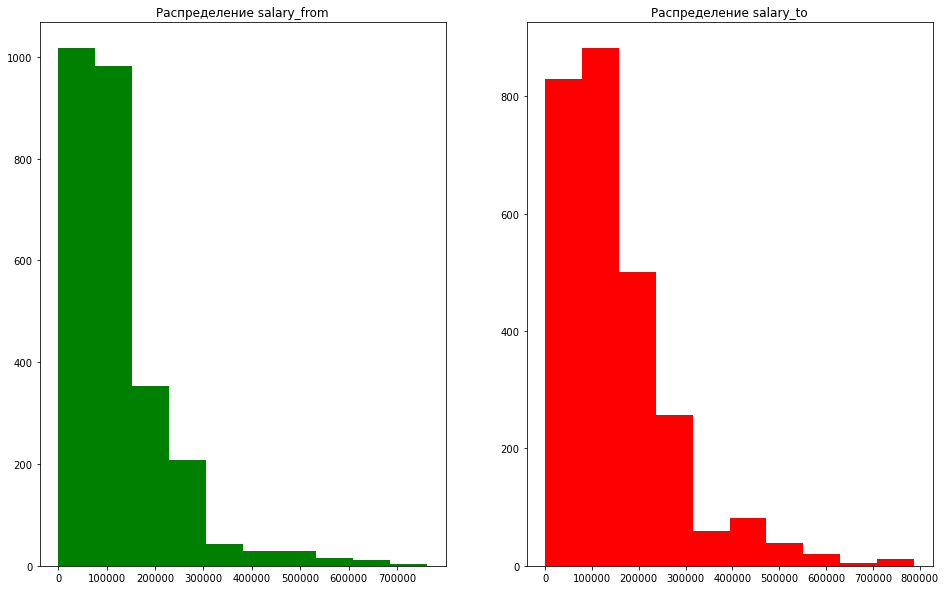

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
axes[0].hist(data=df.query('salary_from < 800000'), x='salary_from', color="green", ),
axes[1].hist(data=df.query('salary_to < 800000'), x='salary_to', color="red")
axes[0].set_title('Распределение salary_from')
axes[1].set_title('Распределение salary_to')
;

''

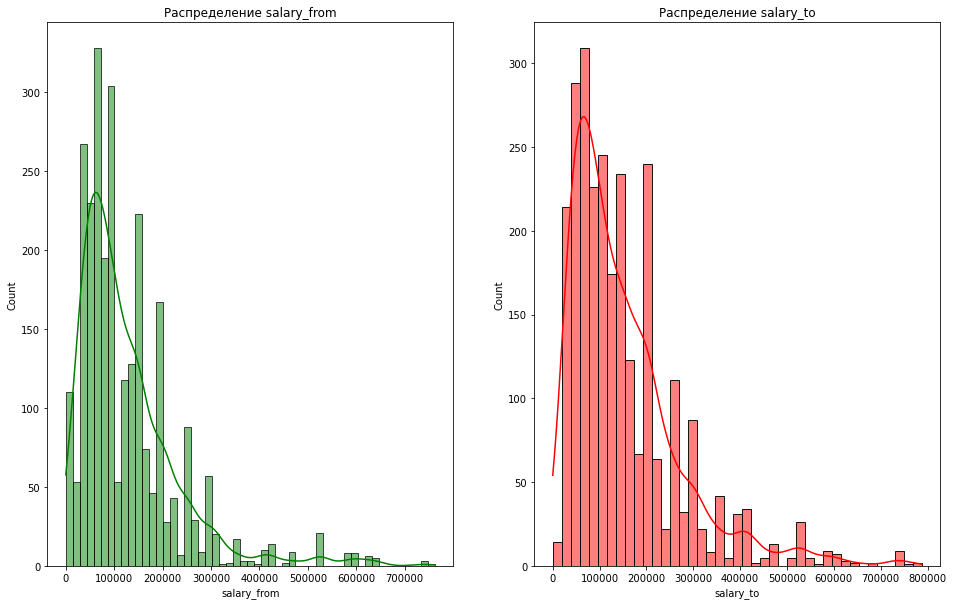

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
sns.histplot(data=df.query('salary_from < 800000'), x= 'salary_from', ax=axes[0], color='green', kde=True)
sns.histplot(data=df.query('salary_to < 800000'), x= 'salary_to', ax=axes[1], color='red',kde=True)
axes[0].set_title('Распределение salary_from')
axes[1].set_title('Распределение salary_to')
;

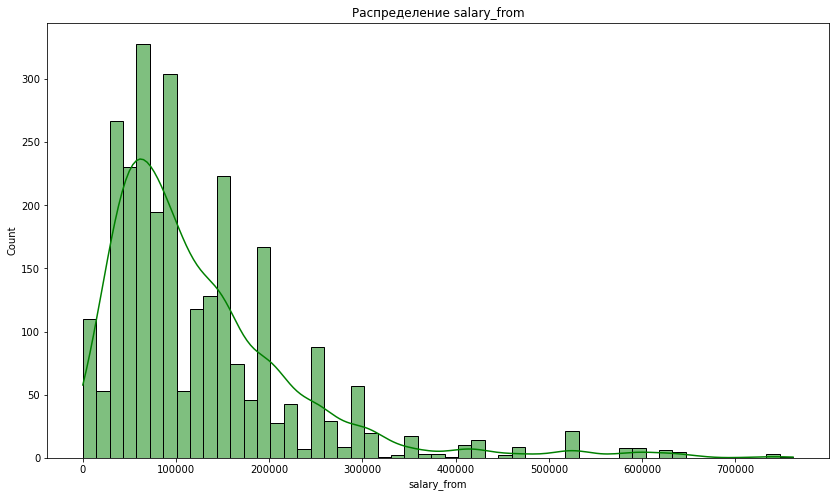

In [ ]:
fig = plt.figure(figsize=(14, 8))
sns.histplot(data=df.query('salary_from < 800000'), 
             x='salary_from',
             color='green',
             kde=True,
             )
plt.title('Распределение salary_from')
plt.show()

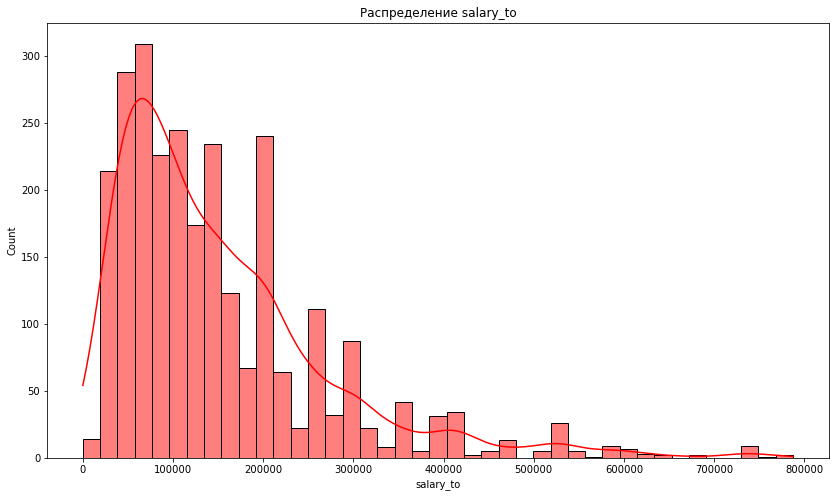

In [ ]:
fig = plt.figure(figsize=(14, 8))
sns.histplot(data=df.query('salary_to < 800000'), 
             x='salary_to',
             color='red',
             kde=True,
             )
plt.title('Распределение salary_to')
plt.show()

Наблюдаем, гистограммы распределений смещены в левую сторону. Это объясняется тем, что 75% вакансий имеют зарплатную вилку до 160(salary_from) - 200(salary_to)к

In [ ]:
df.query('salary_to < 800000').describe()

,salary_from,salary_to
count,2684.000000,2684.000000
mean,126116.878204,151912.649106
std,103322.692208,120024.945193
min,110.000000,110.000000
25%,60000.000000,65000.000000
50%,100000.000000,120000.000000
75%,160000.000000,200000.000000
max,761806.500000,787500.000000


''

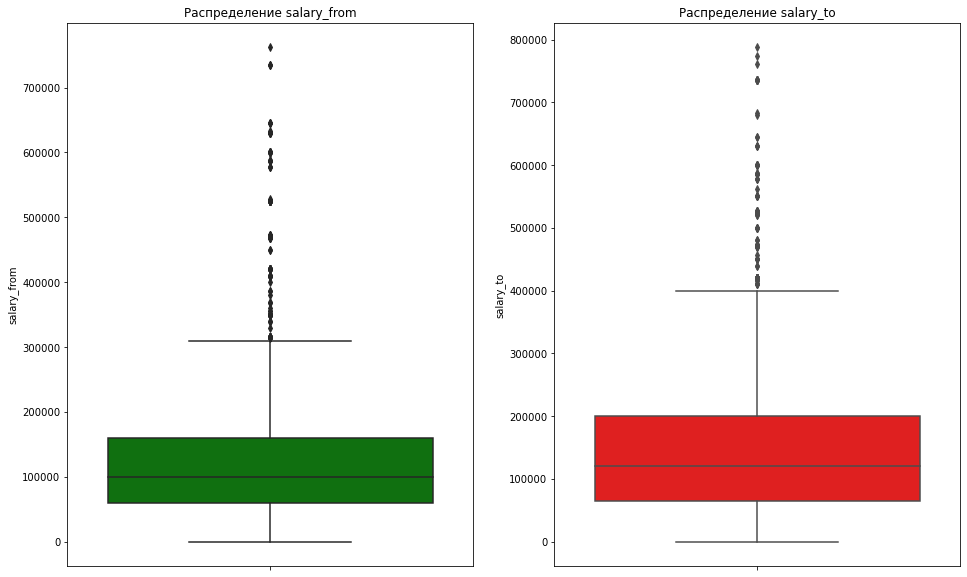

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
sns.boxplot(data=df.query('salary_from < 800000'), y= 'salary_from', ax=axes[0], color='green')
sns.boxplot(data=df.query('salary_to < 800000'), y= 'salary_to', ax=axes[1], color='red')
axes[0].set_title('Распределение salary_from')
axes[1].set_title('Распределение salary_to')
;

In [ ]:
df['schedule'].nunique()

5

''

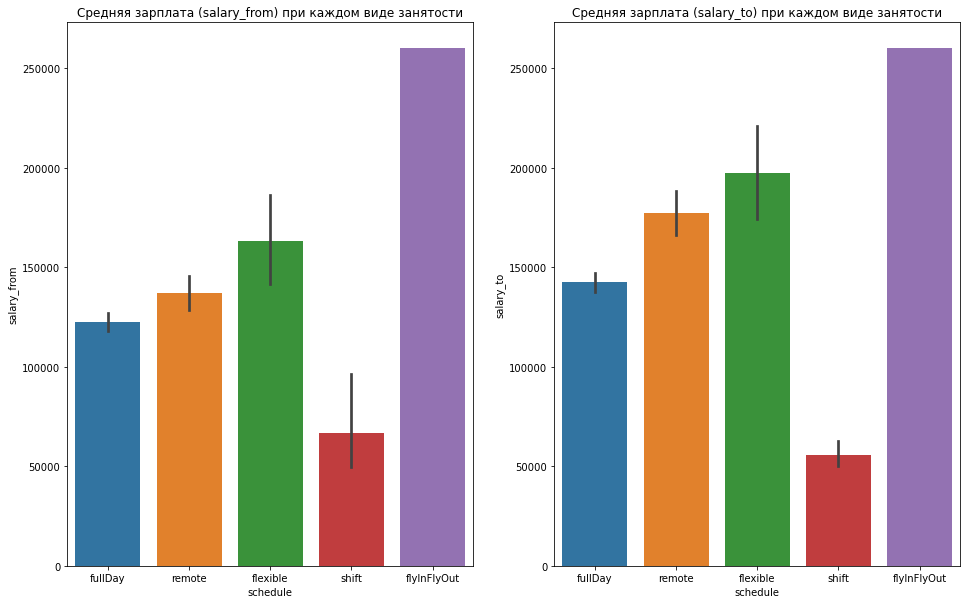

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
sns.barplot(data=df.query('salary_from < 800000'), x='schedule', y= 'salary_from',ax=axes[0])
sns.barplot(data=df.query('salary_to < 800000'), x='schedule', y= 'salary_to', ax=axes[1])
axes[0].set_title('Средняя зарплата (salary_from) при каждом виде занятости')
axes[1].set_title('Средняя зарплата (salary_to) при каждом виде занятости')
;

''

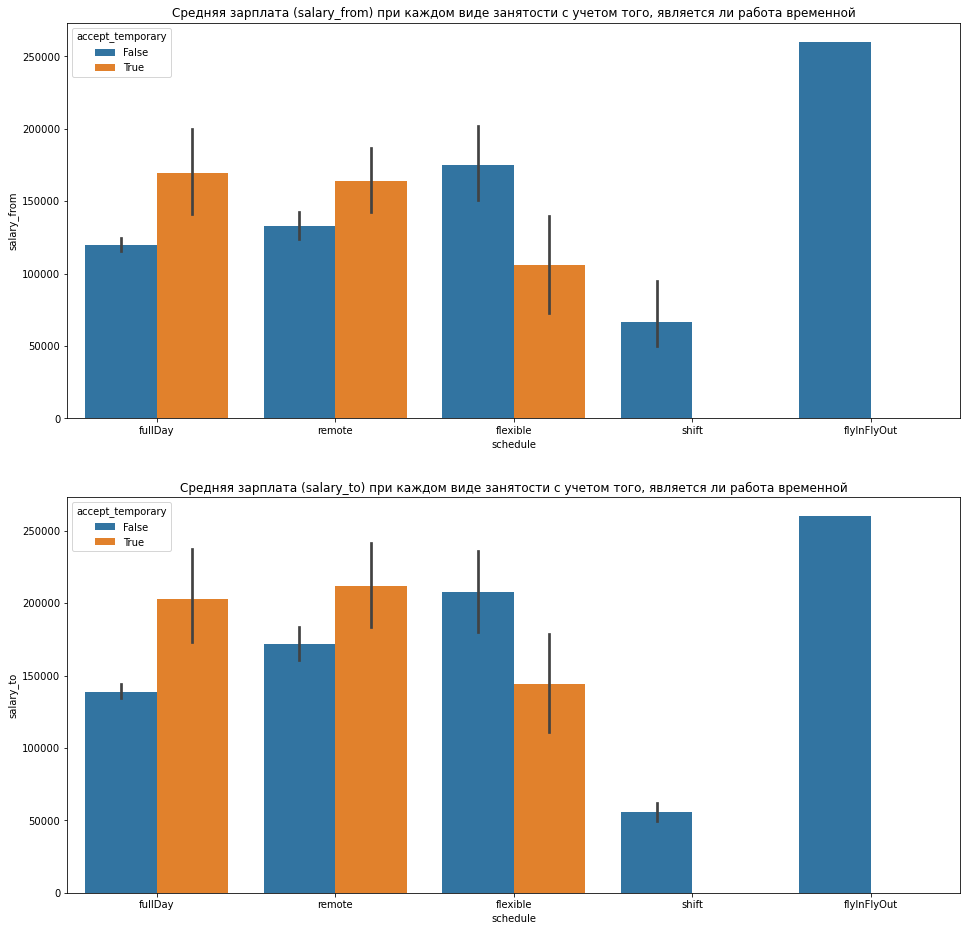

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16, 16))
sns.barplot(data=df.query('salary_from < 800000'), x='schedule', y= 'salary_from', hue='accept_temporary', orient='v',ax=axes[0])
sns.barplot(data=df.query('salary_to < 800000'), x='schedule', y= 'salary_to', hue='accept_temporary', orient='v', ax=axes[1])
axes[0].set_title('Средняя зарплата (salary_from) при каждом виде занятости с учетом того, является ли работа временной')
axes[1].set_title('Средняя зарплата (salary_to) при каждом виде занятости с учетом того, является ли работа временной')
;

Видим, что при сменном графике работы и при работе вахтовым методом не предполагается временная занятость. \
При занятости полный день и удаленно можно получать больше, если работа является временной.

In [ ]:
df.head()

,name,schedule,accept_temporary,published_at,city,salary_from,salary_to
0,Senior Machine Learning Engineer,fullDay,True,2022-12-24T01:29:25+0300,Москва,468804.0,679765.8
1,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Армения,525000.0,525000.0
2,Аналитик Data Science (консультант),remote,False,2022-12-23T09:18:27+0300,Москва,1575.0,2100.0
3,Machine learning engineer/ разработчик машинно...,remote,False,2022-12-19T13:22:24+0300,Пермь,200000.0,400000.0
4,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Тбилиси,525000.0,525000.0


In [ ]:
treemap_data1 = df.query('salary_from < 800000').groupby(by=['city'], as_index=False)[['salary_from']].mean()

fig = px.treemap(
    data_frame=df.query('salary_from < 800000'), 
    path=['city'], 
    values='salary_from', 
    height=600, 
    width=1000, 
    title='Насыщенность городов вакансиями (по уровню salary_from)'
)
fig.show()


In [ ]:
treemap_data2 = df.query('salary_to < 800000').groupby(by='city', as_index=False)[['salary_to']].mean()

fig = px.treemap(
    data_frame=df.query('salary_to < 800000'), 
    path=['city'], 
    values='salary_to', 
    height=600, 
    width=1000, 
    title='Насыщенность городов вакансиями (по уровню salary_to)'
)
fig.show()